# Node and Graph Embeddings with Color Refinement
 
This is a technique for embedding node attributes and local neighborhoods such that when two nodes have the same color there is an arbitrarily close to 100% chance that they have identical local neighborhoods.
 
Primarily based on this lecture:

Stanford Online, Professor Jure Leskovec
[CS224W: Machine Learning with Graphs | 2021 | Lecture 2.3 - Traditional Feature-based Methods: Graph](https://www.youtube.com/watch?v=buzsHTa4Hgs&t=701s)
   

[Source Code for ColorRefinment](https://github.com/parkerburchett/TDC-DeepLearning/blob/main/utils/ColorRefinement.py) 

In [3]:
import ColorRefinement as cr
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pysmiles import read_smiles

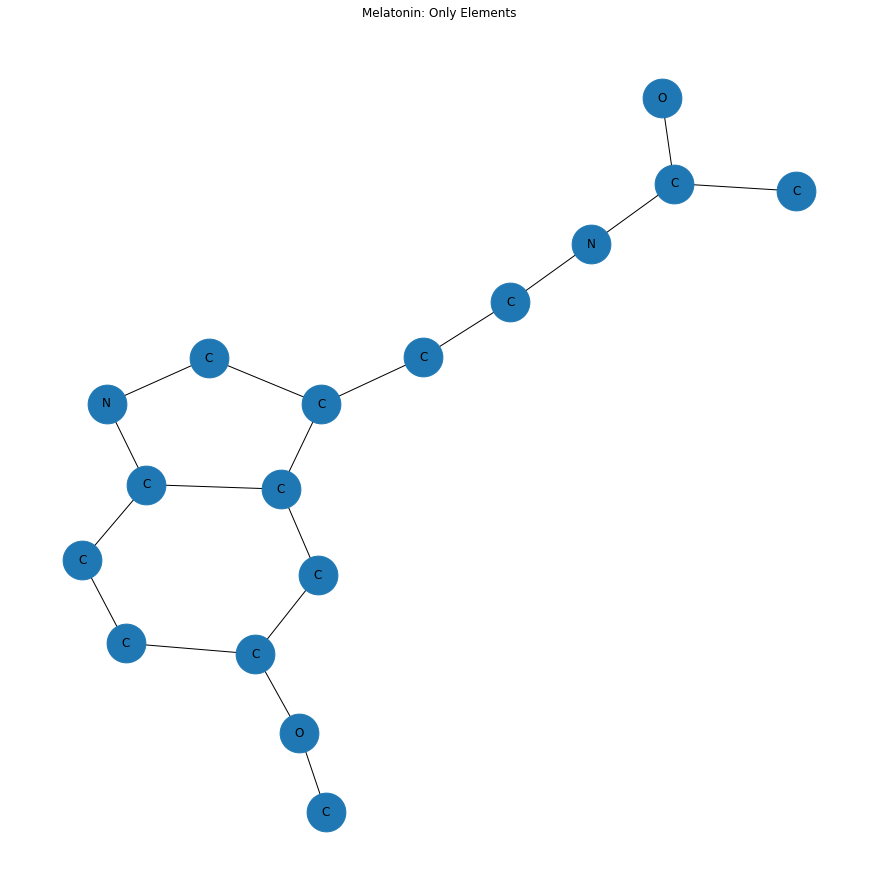

In [4]:
melatonin ='CC(=O)NCCC1=CNc2c1cc(OC)cc2'
#https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system

mol = read_smiles(melatonin)# Node and Graph Embeddings with Color Refinement

for n in mol.nodes:
    del mol.nodes[n]['charge']
    del mol.nodes[n]['hcount']
    del mol.nodes[n]['aromatic']

labels = nx.get_node_attributes(mol, 'element')

plt.figure(figsize=(12,12)) 
nx.draw_kamada_kawai(mol,labels=labels,node_size=1500)
plt.title('Melatonin: Only Elements')
plt.show()

# Color Refinement

In [5]:
color_graph = cr._compute_K_color_refinements(G=mol,K=5, num_buckets=10000)
# returns a graph of the same structure after running the ColorRefinement Algorithm 5 times with 10 thousand possible colors.
color_graph.nodes.data(True)

NodeDataView({0: {'color_0': 2714, 'color_1': 6230, 'color_2': 1701, 'color_3': 4621, 'color_4': 4088}, 1: {'color_0': 2714, 'color_1': 7702, 'color_2': 9114, 'color_3': 8071, 'color_4': 3081}, 2: {'color_0': 3825, 'color_1': 1390, 'color_2': 256, 'color_3': 9382, 'color_4': 6761}, 3: {'color_0': 8898, 'color_1': 6555, 'color_2': 2284, 'color_3': 9048, 'color_4': 8942}, 4: {'color_0': 2714, 'color_1': 5779, 'color_2': 9810, 'color_3': 1396, 'color_4': 8423}, 5: {'color_0': 2714, 'color_1': 4988, 'color_2': 340, 'color_3': 424, 'color_4': 380}, 6: {'color_0': 2714, 'color_1': 1302, 'color_2': 2055, 'color_3': 831, 'color_4': 6384}, 7: {'color_0': 2714, 'color_1': 5779, 'color_2': 9078, 'color_3': 7231, 'color_4': 7263}, 8: {'color_0': 8898, 'color_1': 6555, 'color_2': 3806, 'color_3': 369, 'color_4': 4798}, 9: {'color_0': 2714, 'color_1': 7729, 'color_2': 508, 'color_3': 7060, 'color_4': 1738}, 10: {'color_0': 2714, 'color_1': 1302, 'color_2': 5705, 'color_3': 6696, 'color_4': 1255}, 11

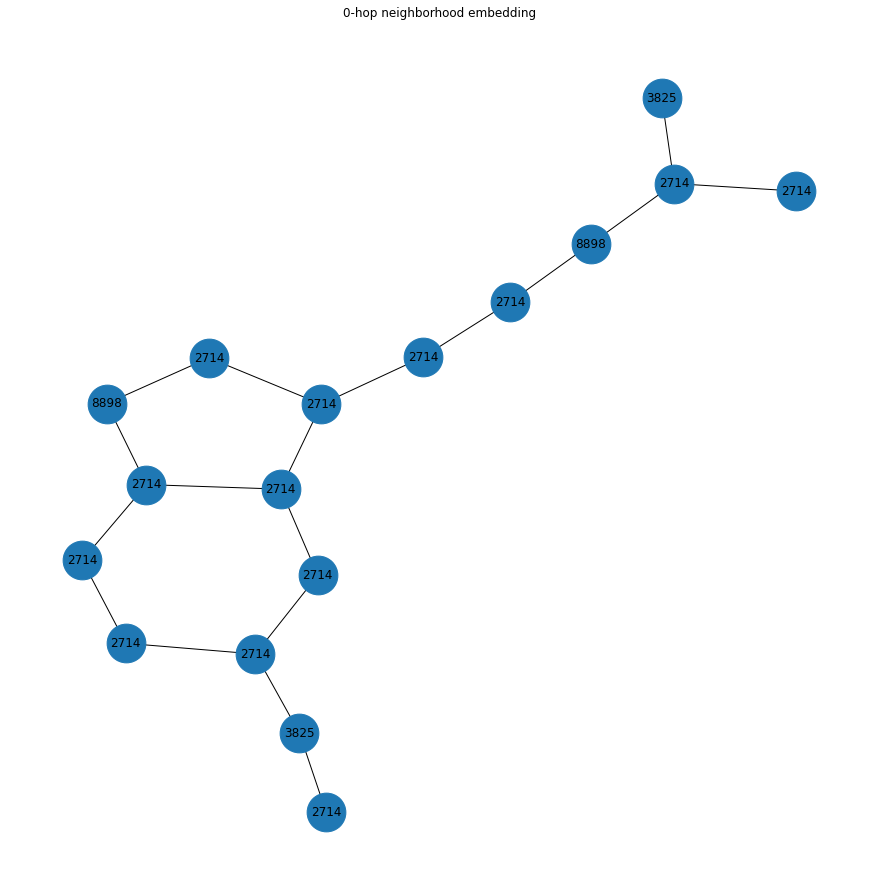

In [6]:
labels = nx.get_node_attributes(color_graph, 'color_0') 
plt.figure(figsize=(12,12)) 
nx.draw_kamada_kawai(color_graph,labels=labels,node_size=1500)
plt.title('0-hop neighborhood embedding')
plt.show()

Each integer corresponds to a neighborhood of size 0 (only that element). Because there are only 3 elements there are only 3 integers.


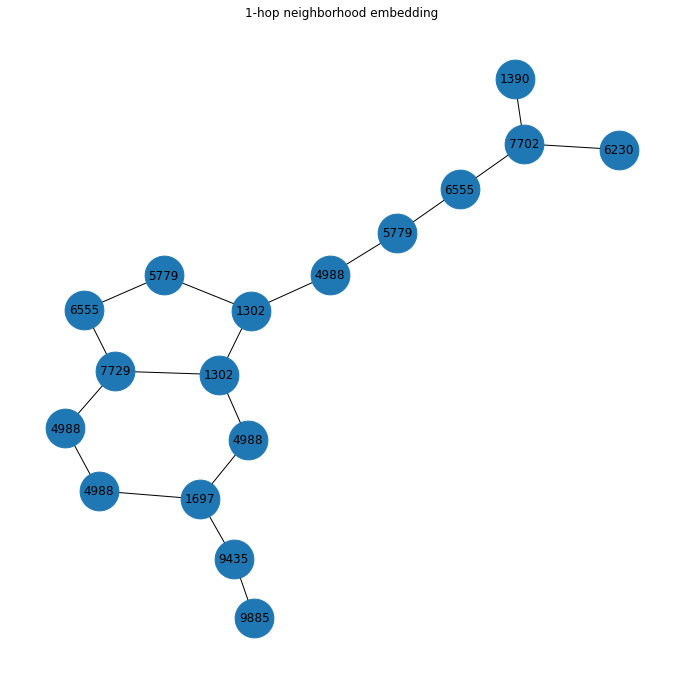

In [7]:
labels = nx.get_node_attributes(color_graph, 'color_1') 
plt.figure(figsize=(12,12)) 
plt.title('1-hop neighborhood embedding')
nx.draw_kamada_kawai(color_graph,labels=labels,node_size=1500)
plt.show()

Now each integer corrponds to a unique 1-hop neighborhood. There are more unique nieghborhood since there are many more combinations of 1 hop neighborhoods than with 0. For example, many of the Carbons have the same 1 hop neighborhoods.

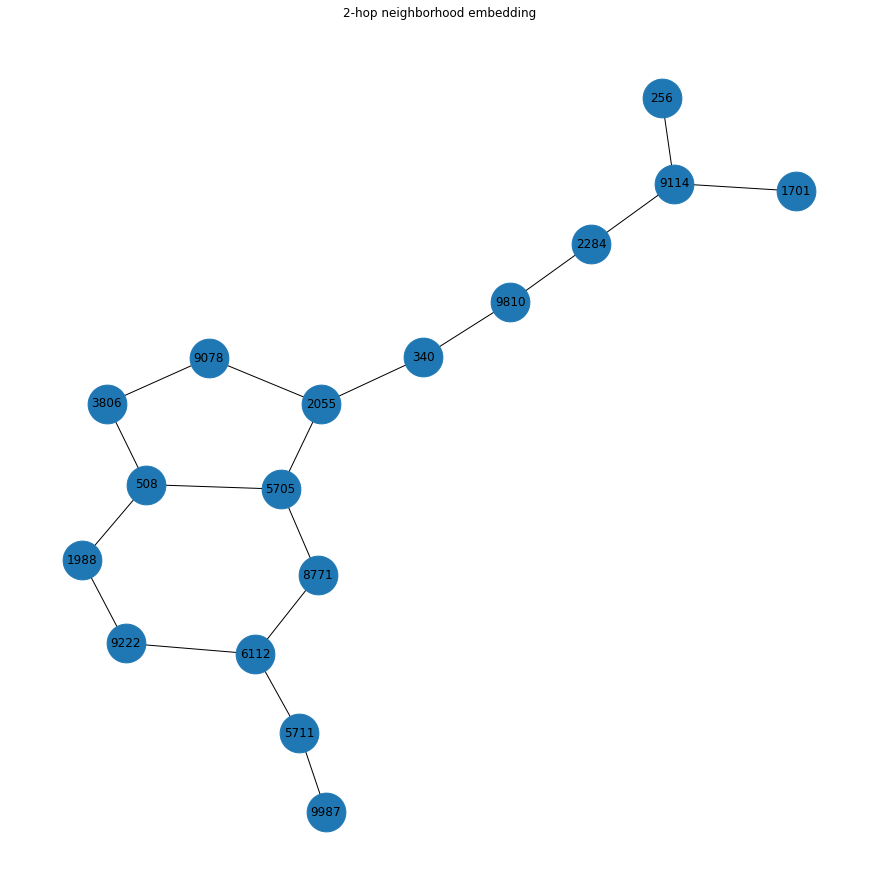

In [8]:
labels = nx.get_node_attributes(color_graph, 'color_2') 
plt.figure(figsize=(12,12)) 
nx.draw_kamada_kawai(color_graph,labels=labels,node_size=1500)
plt.title('2-hop neighborhood embedding')
plt.show()

Each integer corresponds to a unique 2 hop neighborhood.
 
There are no two nodes that have identical 2 hop neighborhoods around them. 

# Questions

1. How readable is ColorRefinements.py?
2. Is the hash function solid? I want all neighborhoods to hash into close to random buckets.
3. Help with the math for calculating False Positives.
4. What other features should I add?
5. An idea for the optimal value for K? 

In [9]:
cr._compute_node_colors(mol,3,10000)
# there are no nodes that have the same 2 hop neighborhood

,Node_0,Node_1,Node_2,Node_3,Node_4,Node_5,Node_6,Node_7,Node_8,Node_9,Node_10,Node_11,Node_12,Node_13,Node_14,Node_15,Node_16
iteration_number,,,,,,,,,,,,,,,,,
color_0,2714,2714,3825,8898,2714,2714,2714,2714,8898,2714,2714,2714,2714,3825,2714,2714,2714
color_1,6230,7702,1390,6555,5779,4988,1302,5779,6555,7729,1302,4988,1697,9435,9885,4988,4988
color_2,1701,9114,256,2284,9810,340,2055,9078,3806,508,5705,8771,6112,5711,9987,9222,1988


# This is what I use externally




In [10]:
df = pd.read_csv('/home/parkerburchett/Documents/GitHub/TDC/TDC-DeepLearning/data/cleaned_raw_data.csv')
sample_smiles = [read_smiles(s) for s in df.loc[:100,'SMILE']]



feature_dfs = cr.create_hop_feature_dfs(sample_smiles, 5,100)


E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "\", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded
E/Z stereochemical information, which is specified by "/", will be discarded


In [11]:
feature_dfs[0] # the 0 hop embedding

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
